In [1]:
import os
import cv2
import matplotlib.pyplot as plt  

In [2]:
path='brain_tumor'

In [3]:
list(os.listdir(path+'/Training'))

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [4]:
labels=['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']
class_map={
    'no_tumor':0,
    'glioma_tumor':1,
    'meningioma_tumor':2,
    'pituitary_tumor':3
}

Images=[]
Labels=[]
h,w=224,224

## Read Data

In [5]:
for label in labels:
  folderpath=os.path.join(path+'/Training/',label)
  for j in os.listdir(folderpath):
    img=cv2.imread(os.path.join(folderpath,j))
    img=cv2.resize(img,(h,w))
    Images.append(img)
    Labels.append(class_map[label])

In [6]:
for label in labels:
  folderpath=os.path.join(path+'/Testing/',label)
  for j in os.listdir(folderpath):
    img=cv2.imread(os.path.join(folderpath,j))
    img=cv2.resize(img,(h,w))
    Images.append(img)
    Labels.append(class_map[label])

In [7]:
import numpy as np

In [8]:
X=np.array(Images)
y=np.array(Labels)

In [9]:
X.shape,y.shape

((2097, 224, 224, 3), (2097,))

# Visualization

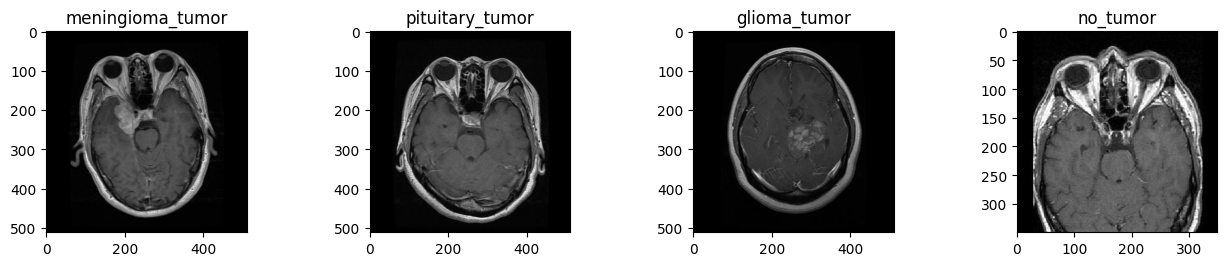

In [11]:
path='brain_tumor/Training/'
plt.figure(figsize=(16,12))


fileName=[os.listdir(path+labels[0])[5],os.listdir(path+labels[1])[0],os.listdir(path+labels[2])[0],os.listdir(path+labels[3])[0]]

for i in range(4):
  ax=plt.subplot(4,4,i+1)
  img=implot.imread(path+labels[i]+'/'+fileName[i]) #'drive/My Drive/brain_tumor/Training/class_name(floder)/imagename.jpg'
 #/ img=img.resize(img,(h,w))
  plt.imshow(img)
  plt.title(labels[i])

In [12]:
from sklearn.utils import shuffle
X,y=shuffle(X,y)

In [13]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [14]:
from sklearn.model_selection import train_test_split 
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

# VGG19 model

In [ ]:
import tensorflow
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dropout,Dense
from keras.applications.vgg19 import VGG19


base_model=VGG19(
    input_shape=(h,w,3),
    weights='imagenet',
    include_top=False,
    pooling='max'
)
base_model.summary()

In [38]:
model=Sequential([
                  base_model,
                  Dropout(0.4),
                  Dense(4,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
Total params: 20,026,436
Trainable params: 20,026,436
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(train_X,train_y,epochs=5,batch_size=32)


Epoch 1/5
16/53 [========>.....................] - ETA: 13:25 - loss: 10.8167 - accuracy: 0.2949

# CNN model

In [22]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
train_X.shape

(1677, 224, 224, 3)

In [26]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 186624)            0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(train_X,train_y,batch_size=128,epochs=5,validation_split=0.2)

Epoch 1/5
11/11 [==============================] - 31s 3s/step - loss: 416.9211 - accuracy: 0.3147 - val_loss: 9.2843 - val_accuracy: 0.3482
Epoch 2/5
11/11 [==============================] - 33s 3s/step - loss: 3.4470 - accuracy: 0.3878 - val_loss: 1.5663 - val_accuracy: 0.3720
Epoch 3/5
11/11 [==============================] - 32s 3s/step - loss: 1.1983 - accuracy: 0.5130 - val_loss: 0.9846 - val_accuracy: 0.6339
Epoch 4/5
11/11 [==============================] - 32s 3s/step - loss: 0.6626 - accuracy: 0.7763 - val_loss: 0.7086 - val_accuracy: 0.7738
Epoch 5/5
11/11 [==============================] - 34s 3s/step - loss: 0.2381 - accuracy: 0.9202 - val_loss: 0.6715 - val_accuracy: 0.8006
